In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import randint

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Processamento de dados
import pandas as pd
import numpy as np

# Usado no modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import seaborn as sns

# Graficos que ilustram o modelo
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz


# `COMPILANDO OS DADOS OBTIDOS`:
Os modelos abordados pelo projeto foram o  `Modelo Logístico` e o `Modelo Random Forest`.                                                                                      
Com isso, comparando os dados obtidos de ambos esses modelos, foi possível obter conclusões a partir de cada iteração feita.                                              Assim:

`Primeira Etapa`.
No modelo logístico, foi feita a transformação das variaveis categoricas em variaveis booleanas. Esse procedimento foi feito pelo metodo `get_dummies()`. Os resultados obtidos foram:

## Primeiro `Modelo Logístico` com o banco de dados

In [9]:
dados = pd.read_csv('dados_filtrados.csv',sep=';').dropna()
dados.head(5)

,vacina_descricao_dose,paciente_idade,paciente_racaCor_valor,paciente_endereco_uf,vacina_categoria_nome,paciente_enumSexoBiologico
0,1ª Dose,38.0,AMARELA,SP,Faixa Etária,M
1,3ª Dose,5.0,BRANCA,RS,Faixa Etária,M
2,1ª Dose,48.0,SEM INFORMACAO,SP,Faixa Etária,M
3,1ª Dose,77.0,SEM INFORMACAO,MG,Faixa Etária,F
4,Reforço,63.0,SEM INFORMACAO,SP,Faixa Etária,M


**Definindo os tipos dos dados**

In [10]:
dados = dados.astype({
    'vacina_descricao_dose' : 'category',
    'paciente_idade' : 'int8',
    'paciente_racaCor_valor' : 'category',
    'paciente_endereco_uf' : 'category',
    'vacina_categoria_nome' : 'category',
    'paciente_enumSexoBiologico' : 'category'
})

**Padronização dos dados da coluna `paciente_idade`**

Esse passo é necessário para aumentar a acurácia do modelo pois distribui os dados em um range de média 0 e desvio padrão e 1.

In [11]:
scaler = StandardScaler()
scaler_fit = scaler.fit_transform(dados['paciente_idade'].to_frame())

**Converter variáveis categóricas em variáveis booleanas**

Assim, é possível utiliza-las no modelo de Regressão Logística.
A função `get_dummies()` retorna um dataframe para cada categoria onde as células são valores booleanos

In [12]:
uf = pd.get_dummies(dados["paciente_endereco_uf"],drop_first=True).reset_index(drop=True)
sexobio = pd.get_dummies(dados["paciente_enumSexoBiologico"],drop_first=True).reset_index(drop=True)
cor = pd.get_dummies(dados["paciente_racaCor_valor"],drop_first=True).reset_index(drop=True)
categoria = pd.get_dummies(dados["vacina_categoria_nome"],drop_first=True).reset_index(drop=True)

FeaturesProcessadas = pd.concat([
    pd.Series(scaler_fit.flatten()),
    uf,
    sexobio,
    cor,
    categoria
    ], axis=1)

FeaturesProcessadas.columns = FeaturesProcessadas.columns.astype(str)


TargetProcessado = dados["vacina_descricao_dose"].reset_index(drop=True)

**Separando o banco de dados entre `train` e `test`**

In [13]:
randomState = randint(0,100000)
print(randomState)
x_train,x_test = train_test_split(FeaturesProcessadas, test_size=.3 , train_size=.7 , shuffle=True, random_state=randomState)
y_train,y_test = train_test_split(TargetProcessado, test_size=.3 , train_size=.7 , shuffle=True, random_state=randomState)


13740


**Aplicando o banco de `train` no modelo**

In [14]:
model = LogisticRegression(class_weight='balanced')
model.fit(x_train,y_train)

**Resultados do Modelo**

In [ ]:
testsResult = model.predict(x_test)
print(classification_report(y_test,testsResult))

c:\Users\windows\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\windows\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     precision    recall  f1-score   support

            1ª Dose       0.35      0.01      0.02     91472
    1ª Dose Dobrada       0.00      0.00      0.00         0
1ª Dose Revacinação       0.00      0.04      0.00       178
         1º Reforço       0.02      0.48      0.04      1297
            2ª Dose       0.30      0.01      0.01     84400
2ª Dose Revacinação       0.00      0.14      0.00       148
         2º Reforço       0.13      0.24      0.17     23570
            3ª Dose       0.04      0.21      0.07      2019
3ª Dose Revacinação       0.00      0.21      0.00        82
         3º Reforço       0.01      0.31      0.02       526
            4ª Dose       0.05      0.61      0.09       470
4ª Dose Revacinação       0.00      0.17      0.00       101
         4º Reforço       0.01      0.91      0.01        53
            5ª Dose       0.00      0.58      0.00        19
5ª Dose Revacinação       0.00      0.29      0.00         7
               Dose    

c:\Users\windows\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

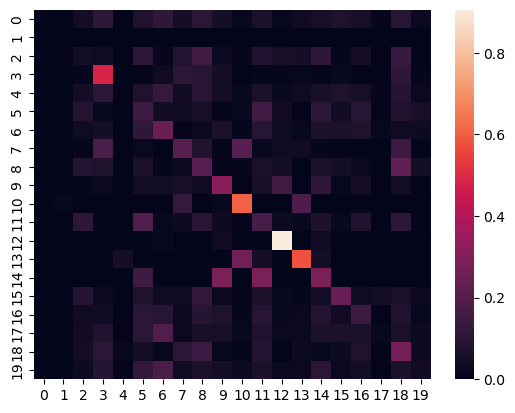

In [ ]:
sns.heatmap(confusion_matrix(y_test,testsResult,normalize='true'))

Ja no modelo do `Random Forest`, foi feita o mesmo tipo de abordagem do modelo logistico e as previsoes obtidas foram as abaixo:
-

In [ ]:
# Separando o banco de dado de treino e teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(FeaturesProcessadas,TargetProcessado, test_size=.3)



In [ ]:
# Treinando o modelo.
rf = RandomForestClassifier()
rf.fit(X_teste, y_teste)


RandomForestClassifier()

In [ ]:
y_previsao = rf.predict(X_teste)
accuracy = accuracy_score(y_teste,y_previsao)

print('Accuracy:', accuracy)

print(classification_report(y_teste,y_previsao))

Accuracy: 0.47048141707960184


c:\Users\windows\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\windows\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     precision    recall  f1-score   support

            1ª Dose       0.48      0.58      0.52     91584
    1ª Dose Dobrada       0.00      0.00      0.00         1
1ª Dose Revacinação       0.73      0.13      0.21       175
         1º Reforço       0.53      0.40      0.46      1355
            2ª Dose       0.48      0.47      0.47     84194
2ª Dose Revacinação       0.65      0.10      0.18       148
         2º Reforço       0.55      0.17      0.25     23768
            3ª Dose       0.54      0.25      0.35      1982
3ª Dose Revacinação       0.67      0.06      0.11        67
         3º Reforço       0.69      0.18      0.29       540
            4ª Dose       0.61      0.25      0.36       506
4ª Dose Revacinação       0.65      0.11      0.19       101
         4º Reforço       1.00      0.08      0.15        63
            5ª Dose       0.54      0.44      0.48        16
5ª Dose Revacinação       1.00      0.36      0.53        11
               Dose    

c:\Users\windows\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
display(dados['vacina_descricao_dose'])

0             1ª Dose
1             3ª Dose
2             1ª Dose
3             1ª Dose
4             Reforço
              ...    
1048570       2ª Dose
1048571    2º Reforço
1048572       2ª Dose
1048573       Reforço
1048574       2ª Dose
Name: vacina_descricao_dose, Length: 994907, dtype: object

Mesmo usando o mesmo metodo para abordar as situacoes, foram obtidos resultados diferentes. Comparando-os:
-

`MODELO LOGISTICO`:

<Axes: >

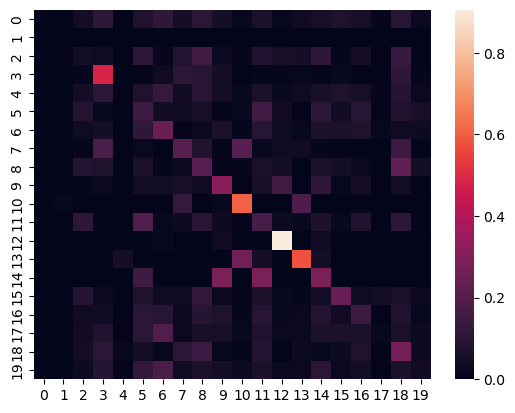

In [ ]:
sns.heatmap(confusion_matrix(y_test,testsResult,normalize='true'))

`RANDOM FOREST`:

<Axes: >

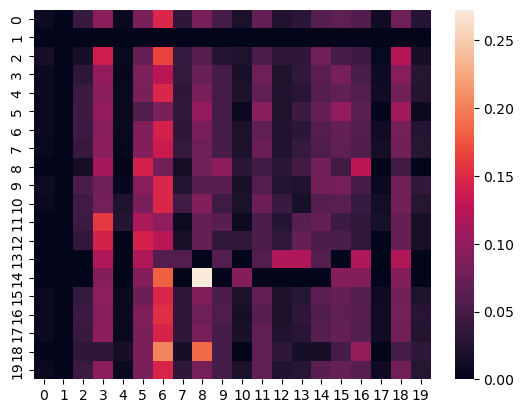

In [ ]:
sns.heatmap(confusion_matrix(y_teste,testsResult,normalize='true'))

`ITERANDO`: Vamos usar os mesmos métodos em ambos os modelos, pois simplificará a análise de dados e fará com que nossas estimativas sejam  compativeis e aptas a comparacao entre diferentes modelos . 


-A primeira iteração foi feita por meio do Feature Selection

___

## 1ª ITERACAO
### SIMPLIFICANDO BANCO DE DADOS
`ITERANDO`: Vamos usar os mesmos métodos em ambos os modelos, pois simplificará a análise de dados e fará com que nossas estimativas sejam  compativeis e aptas a comparacao entre diferentes modelos . 


-A primeira iteração foi feita por meio do Feature Selection

Dado que a coluna `target` possui muitas categorias distintas (19 opções de descrição para a dose da vacina), o modelo tem dificuldade em prever o caso em que o paciente tomou a `3ª dose`.
Para melhorar a quantidade de dados disponíveis, essa coluna irá ser simplificada em rótulos.

In [ ]:
display(pd.Series(dados['vacina_descricao_dose'].unique()).to_frame())

,0
0,1ª Dose
1,3ª Dose
2,Reforço
3,2ª Dose
4,Única
5,2º Reforço
6,Dose
7,Revacinação
8,Dose Adicional
9,1º Reforço


A simplificação será feita da seguinte maneira:

1ª Dose : `1ª Dose Revacinação`, `1ª Dose Dobrada`, `1º Reforço`, `Única`, `Reforço`, `Dose` e `Revacinação`\
2ª Dose: `2º Reforço`, `2ª Dose Revacinação`, `Dose Adicional`\
3ª Dose: `3º Reforço` e `3ª Dose Revacinação`\
4ª Dose: `4º Reforço` e `4ª Dose Revacinação`\
5ª Dose: `5ª Dose Revacinação`



In [ ]:
TargetProcessado2 = dados["vacina_descricao_dose"].astype('string')

TargetProcessado2.loc[TargetProcessado2.isin(["1ª Dose Revacinação","1ª Dose Dobrada","1º Reforço","Única","Reforço","Dose","Revacinação"])] = "1ª Dose"
TargetProcessado2.loc[TargetProcessado2.isin(["2º Reforço","2ª Dose Revacinação","Dose Adicional"])] = "2ª Dose"
TargetProcessado2.loc[TargetProcessado2.isin(["3º Reforço","3ª Dose Revacinação"])] = "3ª Dose"
TargetProcessado2.loc[TargetProcessado2.isin(["4º Reforço","4ª Dose Revacinação"])] = "4ª Dose"
TargetProcessado2.loc[TargetProcessado2.isin(["5ª Dose Revacinação"])] = "5ª Dose"

TargetProcessado2 = TargetProcessado2.astype('category')

In [ ]:
(TargetProcessado2.value_counts(normalize=True)*100).round(2)

vacina_descricao_dose
1ª Dose    61.81
2ª Dose    37.10
3ª Dose     0.87
4ª Dose     0.22
5ª Dose     0.01
Name: proportion, dtype: float64

**Separando a nova coluna `Target` entre `train` e `test`**

In [ ]:
y_train,y_test = train_test_split(TargetProcessado2, test_size=.3 , train_size=.7 , shuffle=True, random_state=randomState)

**Aplicando o novo `Target` ao modelo**

In [ ]:
model = LogisticRegression(solver="sag",class_weight='balanced')
model.fit(x_train,y_train)

c:\Users\windows\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(class_weight='balanced', solver='sag')

**Resultados do modelo**

In [ ]:
testsResult = model.predict(x_test)
print(classification_report(y_test,testsResult))

              precision    recall  f1-score   support

     1ª Dose       0.62      0.76      0.68    185049
     2ª Dose       0.37      0.16      0.22    110084
     3ª Dose       0.02      0.16      0.04      2636
     4ª Dose       0.02      0.32      0.04       674
     5ª Dose       0.00      0.10      0.01        30

    accuracy                           0.53    298473
   macro avg       0.21      0.30      0.20    298473
weighted avg       0.52      0.53      0.50    298473



-Analisando o modelo `Random Forest`:

In [ ]:
y_treino,y_teste = train_test_split(TargetProcessado2, test_size=.3 , train_size=.7)

**Aplicando o novo `Target` ao modelo**

In [ ]:
# Treinando o modelo.
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_teste, y_teste)

RandomForestClassifier(class_weight='balanced')

**Resultados do modelo**

In [ ]:
testsResult = rf.predict(X_teste)
print(classification_report(y_teste,testsResult))



              precision    recall  f1-score   support

     1ª Dose       0.76      0.53      0.62    184407
     2ª Dose       0.54      0.51      0.52    110760
     3ª Dose       0.05      0.86      0.10      2634
     4ª Dose       0.03      0.99      0.06       638
     5ª Dose       0.03      1.00      0.06        34

    accuracy                           0.53    298473
   macro avg       0.28      0.78      0.27    298473
weighted avg       0.67      0.53      0.58    298473



`COMPARANDO OS RESULTADOS POR MEIO DO GRAFICO DE CALOR`:


`LOGISTICO`:

In [ ]:
sns.heatmap(confusion_matrix(y_test,testsResult,normalize='true'),annot=True)

NameError: name 'y_test' is not defined

`RANDOM FOREST`:

In [ ]:
sns.heatmap(confusion_matrix(y_teste,testsResult,normalize='true'),annot=True)

NameError: name 'y_teste' is not defined

___
### `SEGUNDA ITERACAO`:

Agora, a coluna foi definida entre os valores `True` e `False` para se o paciente tomou a partir da 2ª dose da vacina.
A partir dessa nova analise feita, foi possivel chegar em resultados mais precisos.


___
### `LOGISTICO:`

In [ ]:
TargetProcessado3 = TargetProcessado2.isin(["2ª Dose","3ª Dose","4ª Dose","5ª Dose"])
print(TargetProcessado3.value_counts(normalize=True))

vacina_descricao_dose
False    0.618053
True     0.381947
Name: proportion, dtype: float64


In [ ]:
y_train,y_test = train_test_split(TargetProcessado3, test_size=.3 , train_size=.7 , shuffle=True, random_state=randomState)

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)

c:\Users\windows\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
testsResult = model.predict(x_test)
print(classification_report(y_test,testsResult))

              precision    recall  f1-score   support

       False       0.62      1.00      0.77    185049
        True       0.56      0.00      0.00    113424

    accuracy                           0.62    298473
   macro avg       0.59      0.50      0.38    298473
weighted avg       0.60      0.62      0.47    298473



In [ ]:
TargetProcessado3 = TargetProcessado2.isin(["2ª Dose","3ª Dose","4ª Dose","5ª Dose"])
print(TargetProcessado3.value_counts(normalize=True))

vacina_descricao_dose
False    0.618053
True     0.381947
Name: proportion, dtype: float64


In [ ]:
y_treino,y_teste = train_test_split(TargetProcessado3, test_size=.3 , train_size=.7)

In [ ]:
# Treinando o modelo.
rf = RandomForestClassifier()
rf.fit(X_teste, y_teste)

RandomForestClassifier()

In [ ]:
testsResult = rf.predict(X_teste)
print(classification_report(y_teste,testsResult))

              precision    recall  f1-score   support

       False       0.68      0.91      0.78    184514
        True       0.68      0.30      0.41    113959

    accuracy                           0.68    298473
   macro avg       0.68      0.60      0.60    298473
weighted avg       0.68      0.68      0.64    298473



___
# COMPARANDO OS MODELOS:

 `LOGISTICO`:

<Axes: >

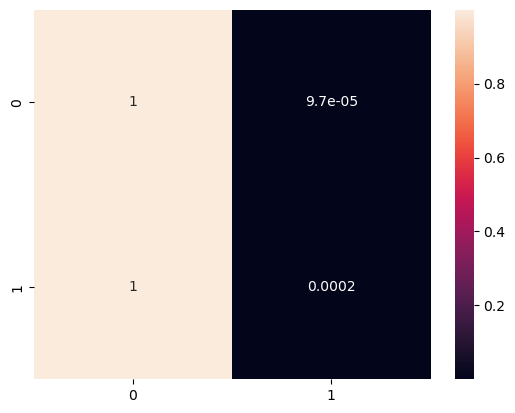

In [ ]:
sns.heatmap(confusion_matrix(y_test,testsResult,normalize='true'),annot=True)

-`RANDOM FOREST`

In [ ]:
sns.heatmap(confusion_matrix(y_teste,testsResult,normalize='true'),annot=True)

NameError: name 'y_teste' is not defined

### `CONCLUSAO`: